## ***KNN***

IMPORTAR LIBRERIAS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

Importar data set de GITHUB

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alex-Flores-Dev/pets-ML/main/train-ohc2.csv')
df.head(6)

,Type,Name,Age,Breed1,Breed2,Gender 1,Gender 2,Gender 3,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated 1,Vaccinated 2,Vaccinated 3,Dewormed 1,Dewormed 2,Dewormed 3,Sterilized 1,Sterilized 2,Sterilized 3,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,0,0,1,7,0,1,1,0,1,0,0,1,0,0,1,0,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,0,0,1,2,0,2,2,0,0,1,0,0,1,0,0,1,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,0,0,2,7,0,2,2,1,0,0,1,0,0,0,1,0,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,0,1,0,1,2,0,2,1,1,0,0,1,0,0,0,1,0,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,0,0,1,0,0,2,1,0,1,0,0,1,0,0,1,0,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2
5,2,NaN,3,266,0,0,1,0,5,6,0,2,1,0,1,0,0,1,0,0,1,0,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2,2


Analizar la data

Text(0.5, 1.0, 'Pets correlation')

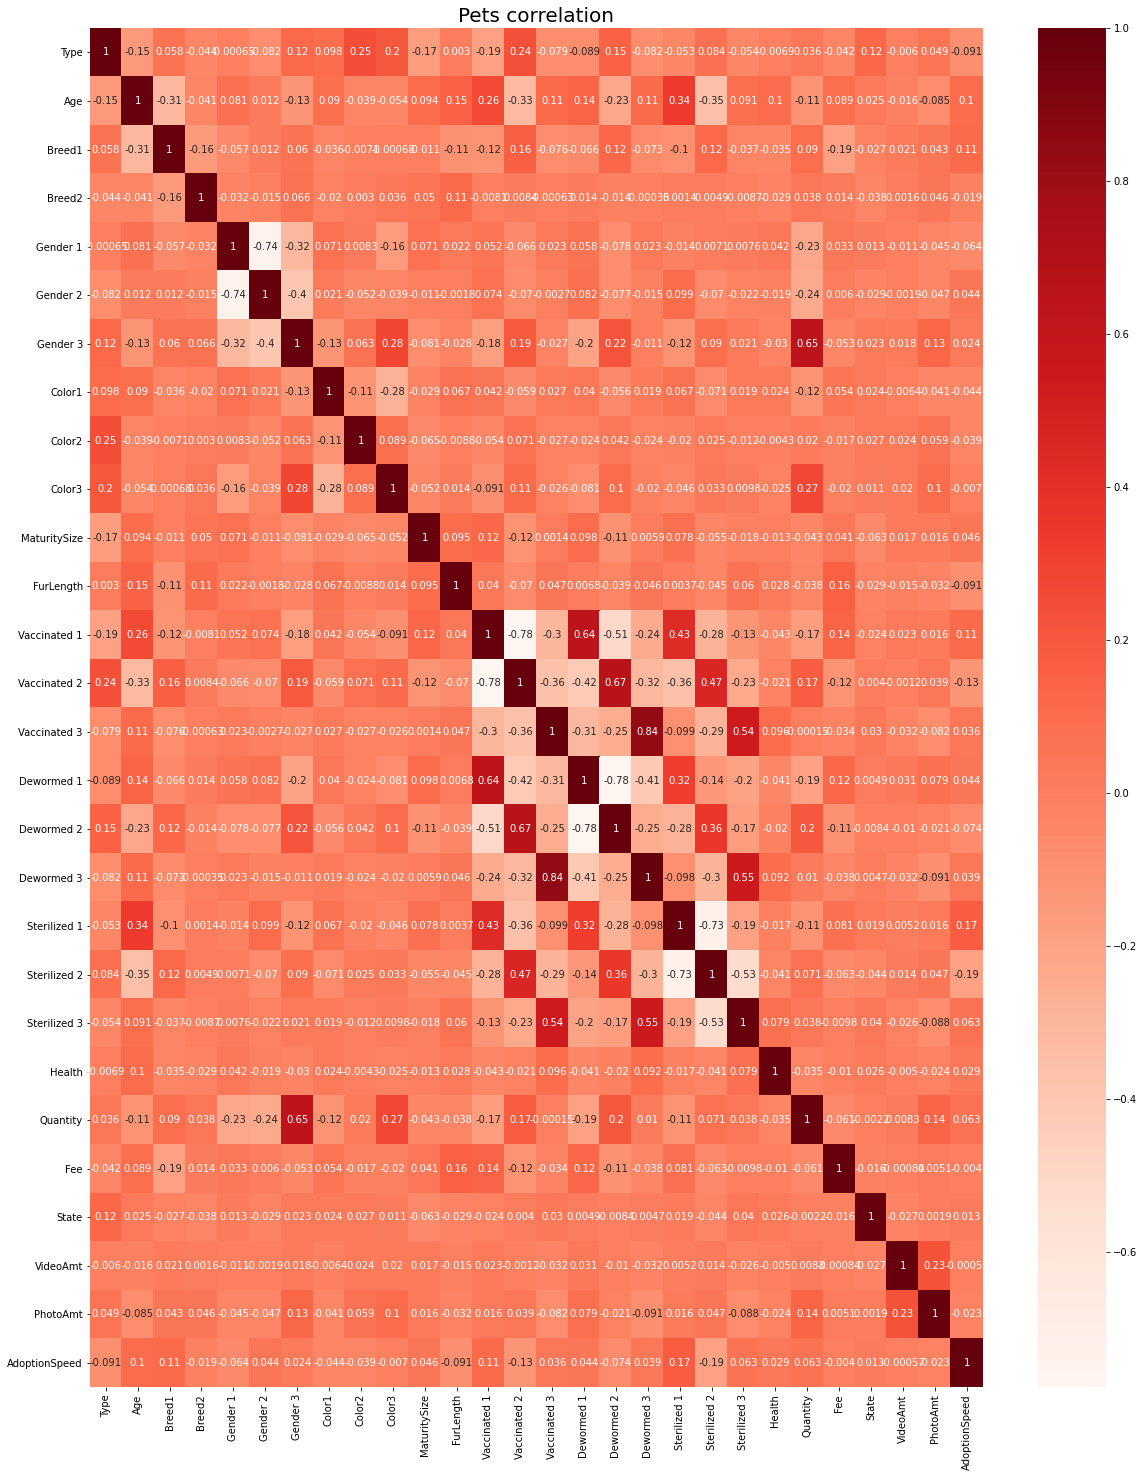

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title('Pets correlation', fontsize=20)

Separamos el target la data a analizar

In [ ]:
X = df.iloc[:, np.r_[5:7,13:21]].values
Y = df.iloc[:, 31].values


In [ ]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [ ]:
Y

array([2, 0, 3, ..., 3, 4, 3])

Hacemos el HOLDOUT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
y_train

array([3, 4, 1, ..., 1, 3, 3])

Entrenamos el modelo

In [ ]:
k_rango = range(1,100)
scores = {}
scores_list = []
for k in k_rango:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
k_rango

range(1, 100)

Resultado del entrenamiento

Text(0, 0.5, 'ValoR de Accuracy en Test')

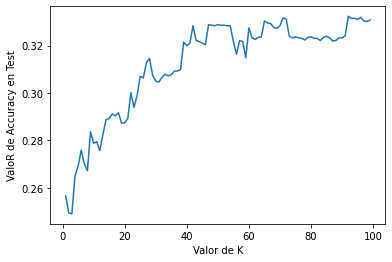

In [ ]:
plt.plot(k_rango,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('ValoR de Accuracy en Test')

***RANDOM FOREST**

---



IMPORTAMOS LIBRERIAS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

IMPORTAR DATA SET

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alex-Flores-Dev/pets-ML/main/train-ohc2.csv')
X = df.iloc[:, 2:15].values
Y = df.iloc[:, 23].values

HOLD OUT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 0)

In [ ]:
stand = StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [ ]:
X_train, X_test

(array([[-0.35934684,  0.44750941, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        [-0.24881666,  0.69578492, -0.60764563, ..., -0.78528992,
          1.22110564, -0.94554875],
        [-0.35934684,  0.01716519, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        ...,
        [-0.52514211,  0.69578492,  1.88035851, ...,  0.88440573,
         -0.81892997,  1.05758693],
        [-0.52514211,  0.01716519, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        [-0.02775629,  0.01716519, -0.60764563, ..., -0.78528992,
          1.22110564, -0.94554875]]),
 array([[-0.41461193, -0.18145521,  1.45083336, ..., -0.78528992,
         -0.81892997,  1.05758693],
        [-0.35934684,  0.69578492, -0.60764563, ...,  0.88440573,
          1.22110564, -0.94554875],
        [-0.35934684,  0.44750941, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        ...,
        [ 0.08277389, -4.05455318, -0.60764563, ..., -

In [ ]:
classifier = RandomForestClassifier(n_estimators=150, criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
mc = confusion_matrix(y_test, y_pred)
mc

array([[3431,   28,    9,    5,    5,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 236,  103,   33,   23,   12,    6,    2,    1,    1,    0,    0,
           1,    0,    0,    0,    0,    0,    0],
       [  68,   64,   33,   20,   18,    7,    2,    2,    1,    0,    1,
           0,    0,    1,    1,    0,    0,    0],
       [  32,   55,   20,   24,   20,    9,    3,    1,    2,    0,    0,
           1,    0,    0,    0,    0,    0,    0],
       [  16,   27,   15,   18,    7,    4,    3,    1,    3,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  13,   14,    5,    8,    5,    6,    4,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   5,    3,    2,    1,    3,    1,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    1],
       [   3,    3,    2,    2,    4,    2,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],


In [ ]:
X_train, y_train

(array([[-0.35934684,  0.44750941, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        [-0.24881666,  0.69578492, -0.60764563, ..., -0.78528992,
          1.22110564, -0.94554875],
        [-0.35934684,  0.01716519, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        ...,
        [-0.52514211,  0.69578492,  1.88035851, ...,  0.88440573,
         -0.81892997,  1.05758693],
        [-0.52514211,  0.01716519, -0.60764563, ..., -0.78528992,
         -0.81892997,  1.05758693],
        [-0.02775629,  0.01716519, -0.60764563, ..., -0.78528992,
          1.22110564, -0.94554875]]), array([3, 1, 1, ..., 1, 5, 1]))

In [ ]:
accuracy_score(y_pred,y_test)

0.8019119608714984

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print(accuracy)
#classification Report
print(classification_report(y_test, y_pred))

0.8019119608714984
              precision    recall  f1-score   support

           1       0.90      0.99      0.94      3478
           2       0.34      0.25      0.29       418
           3       0.27      0.15      0.19       218
           4       0.23      0.14      0.18       167
           5       0.09      0.07      0.08        94
           6       0.16      0.11      0.13        56
           7       0.06      0.06      0.06        18
           8       0.14      0.06      0.08        17
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***SVM***

IMPORTAR LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

IMPORTAR DATA DE GITHUB

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alex-Flores-Dev/pets-ML/main/train.csv')

TARGET

In [ ]:
X = df.iloc[:, 2:15].values
Y = df.iloc[:, 23].values
df.head(4)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2


HOLD OUT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)


Train model

In [ ]:
supportVectorMachine = SVC()
supportVectorMachine.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = supportVectorMachine.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.33125833703868385
